# Most of this code should be pulled into seperate .py files

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import TruncatedSVD
import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)
from sklearn.metrics.pairwise import linear_kernel, euclidean_distances

from sklearn.preprocessing import normalize

In [2]:
# Training matrix
user_item = pd.DataFrame(
    pd.read_csv('/home/grimoire/Projects/BeerRatings/user_item_matrix.csv', index_col='review_profilename'))

X = user_item.values.T

In [3]:
# Test matrix
test_matrix = pd.DataFrame(
    pd.read_csv('/home/grimoire/Projects/BeerRatings/test_matrix.csv', index_col='review_profilename'))

test_matrix = test_matrix.T

In [5]:
beer_names = user_item.columns

In [6]:
def cosine_recommendations(beer, user_item=user_item) :
    
    #############################################################
    # The coeffecient matrix is an 2D array of arrays
    # There is no indication of what columns refer to what beer
    # We will pull this information from our user_item matrix
    # Create a list of the beers from the columns
    # The index of the list will correspond with the coefficient matrix
    #############################################################
    
    # https://stackoverflow.com/questions/944592/best-practice-for-python-assert
    # Self note: build an exception class for beer parameter
    
    beer_names = user_item.columns
    assert beer in beer_names, 'The beer isn\'t currently in the recommendation list,\
 rate it more and it will be soon!' # This derives from user input not matching beer_names, add to exception class
    
    
    beer_name_list = list(beer_names) # Contains the index/name of the beer
    beer_index = beer_name_list.index(beer) # Finds the index of the beer parameter
    beer_list = \
    pd.DataFrame({'cosine_score':cosine_sim[beer_index]})\
    .sort_values(by='cosine_score', 
                 ascending=False)[1:8].index
    return list(beer_names[beer_list])

In [7]:
def pearson_recommendations(beer, user_item=user_item) :
    
    #############################################################
    # The coeffecient matrix is an 2D array of arrays
    # There is no indication of what columns refer to what beer
    # We will pull this information from our user_item matrix
    # Create a list of the beers from the columns
    # The index of the list will correspond with the coefficient matrix
    #############################################################
    
    # https://stackoverflow.com/questions/944592/best-practice-for-python-assert
    # Self note: build an exception class for beer parameter
    
    beer_names = user_item.columns
    assert beer in beer_names, 'The beer isn\'t currently in the recommendation list,\
 rate it more and it will be soon!' # This derives from user input not matching beer_names, add to exception class
    
    beer_name_list = list(beer_names) # Contains the index/name of the beer
    beer_index = beer_name_list.index(beer) # Finds the index of the beer parameter
    beer_list = \
    pd.DataFrame({'corrcoef_score':corr[beer_index]})\
    .sort_values(by='corrcoef_score', 
                 ascending=False)[1:8].index
    return list(beer_names[beer_list])

In [8]:
def euclidean_recommendations(beer, user_item=user_item) :
    
    #############################################################
    # The coeffecient matrix is an 2D array of arrays
    # There is no indication of what columns refer to what beer
    # We will pull this information from our user_item matrix
    # Create a list of the beers from the columns
    # The index of the list will correspond with the coefficient matrix
    #############################################################
    
    # https://stackoverflow.com/questions/944592/best-practice-for-python-assert
    # Self note: build an exception class for beer parameter
    
    beer_names = user_item.columns
    assert beer in beer_names, 'The beer isn\'t currently in the recommendation list,\
 rate it more and it will be soon!' # This derives from user input not matching beer_names, add to exception class
    
    beer_name_list = list(beer_names) # Contains the index/name of the beer
    beer_index = beer_name_list.index(beer) # Finds the index of the beer parameter
    beer_list = \
    pd.DataFrame({'corrcoef_score':eucl_sim[beer_index]})\
    .sort_values(by='corrcoef_score', 
                 ascending=False)[1:8].index
    return list(beer_names[beer_list])

In [9]:
components = [10, 75, 150, 250, 625, 1000, 1500, 2000]
matrices = [TruncatedSVD(n_components=n_comp, random_state=3).fit_transform(X) for n_comp in components]

In [10]:
recommendation_precision = []
user_has_tried = []
    
for trial in matrices :

    corr = np.corrcoef(trial)
    
    precision = 0
    user_tried = 0
    
    for name in test_matrix.columns : # name will be a column (profile name) from matrix
        user_list = list(test_matrix[test_matrix[name] > 0].index) # List of beers that the user drank
        benchmark = 0 # instantiating if any beers were drank from list of recommended
        for beer in user_list :
            recommended_beers = set(pearson_recommendations(beer))
            if recommended_beers & set(user_list) :
                benchmark += 1
        if benchmark > 0 :
            user_tried += 1
        precision += benchmark / len(user_list)
        
    recommendation_precision.append(precision / len(test_matrix.columns))
    user_has_tried.append(user_tried / len(test_matrix.columns))

In [11]:
[tries for tries in user_has_tried]

[0.4327488343807014,
 0.5054226636934928,
 0.5181937968781675,
 0.5233630650719643,
 0.5374518548550578,
 0.5461686600445976,
 0.5521994729373606,
 0.5558990472329212]

In [12]:
[rec for rec in recommendation_precision]

[0.1448259169998671,
 0.20608076717461243,
 0.21574358032973792,
 0.22051583675231115,
 0.23190753949614912,
 0.2399491201303128,
 0.2456376271487097,
 0.24870032390744395]

([<matplotlib.axis.XTick at 0x7fdac01baa90>,
 <a list of 8 Text xticklabel objects>)

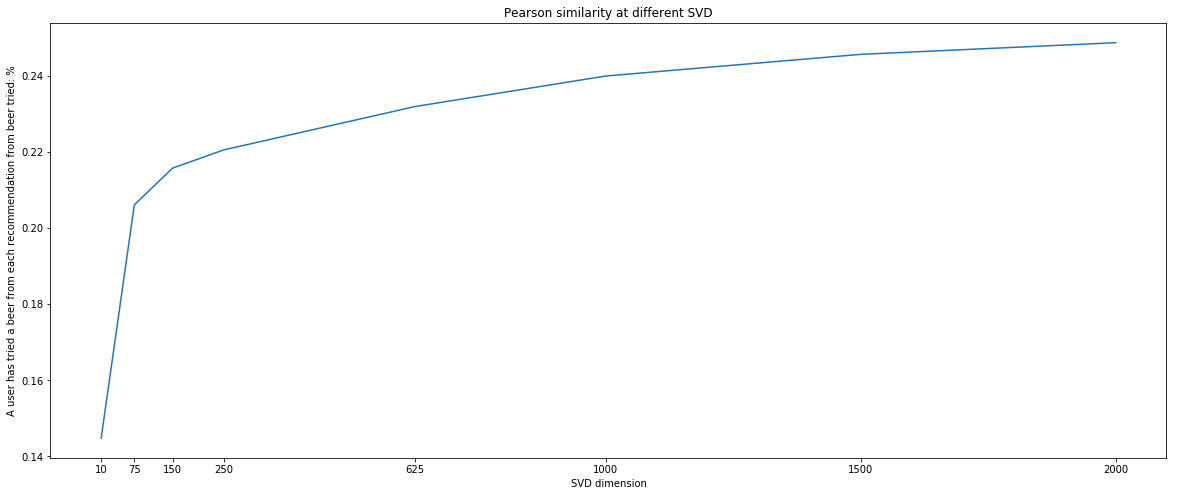

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[20,8])
plt.plot(components, recommendation_precision)
plt.title('Pearson similarity at different SVD')
plt.ylabel('A user has tried a beer from each recommendation from beer tried: %')
plt.xlabel('SVD dimension')
plt.xticks(components)

In [14]:
recommendation_precision = []
user_has_tried = []

for trial in matrices :
    cosine_sim = linear_kernel(trial, trial)
    cosine_sim = normalize(cosine_sim)
    
    precision = 0
    user_tried = 0

    for name in test_matrix.columns : # name will be a column (profile name) from matrix
        user_list = list(test_matrix[test_matrix[name] > 0].index) # List of beers that the user drank
        benchmark = 0 # instantiating if any beers were drank from list of recommended
        for beer in user_list :
            recommended_beers = set(cosine_recommendations(beer))
            if recommended_beers & set(user_list) :
                benchmark += 1
        if benchmark > 0 :
            user_tried += 1
        precision += benchmark / len(user_list)
    recommendation_precision.append(precision / len(test_matrix.columns))
    user_has_tried.append(user_tried / len(test_matrix.columns))

In [15]:
[tries for tries in user_has_tried]

[0.4554530711534563,
 0.5200182444759781,
 0.5622846138252585,
 0.63744171903507,
 0.6777822825866613,
 0.7009933103588081,
 0.7268396513277924,
 0.727802554226637]

In [16]:
[rec for rec in recommendation_precision]

[0.2784916558856606,
 0.29719417898303024,
 0.30448593531735446,
 0.3333283314228271,
 0.35047496954131924,
 0.3663965116665127,
 0.38714345232986447,
 0.3893567541394226]

([<matplotlib.axis.XTick at 0x7fdabfb36a20>,
 <a list of 8 Text xticklabel objects>)

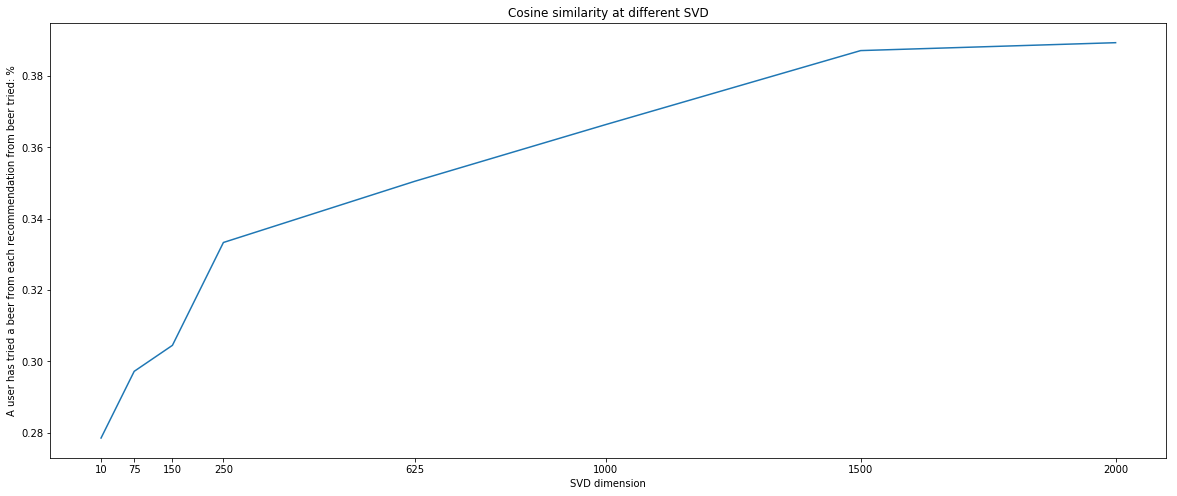

In [17]:
%matplotlib inline

plt.figure(figsize=[20,8])
plt.plot(components, recommendation_precision)
plt.title('Cosine similarity at different SVD')
plt.ylabel('A user has tried a beer from each recommendation from beer tried: %')
plt.xlabel('SVD dimension')
plt.xticks(components)

In [18]:
recommendation_precision = []
user_has_tried = []

for trial in matrices :
    eucl_sim = euclidean_distances(trial, trial)
        
    precision = 0
    user_tried = 0

    for name in test_matrix.columns : # name will be a column (profile name) from matrix
        user_list = list(test_matrix[test_matrix[name] > 0].index) # List of beers that the user drank
        benchmark = 0 # instantiating if any beers were drank from list of recommended
        for beer in user_list :
            recommended_beers = set(euclidean_recommendations(beer))
            if recommended_beers & set(user_list) :
                benchmark += 1
        if benchmark > 0 :
            user_tried += 1
        precision += benchmark / len(user_list)
    recommendation_precision.append(precision / len(test_matrix.columns))
    user_has_tried.append(user_tried / len(test_matrix.columns))

In [19]:
[tries for tries in user_has_tried]

[0.2884147577539023,
 0.29464828704642204,
 0.2978917494425299,
 0.3019967565376039,
 0.30858503952969796,
 0.3066085546320697,
 0.3070139874315832,
 0.3067099128319481]

In [20]:
[rec for rec in recommendation_precision]

[0.13447357808081242,
 0.14713357169404492,
 0.14788712745881658,
 0.15288119666113095,
 0.15830741520537212,
 0.1586606432334881,
 0.15879016985574654,
 0.15869773507285637]

([<matplotlib.axis.XTick at 0x7fdac01b1128>,
 <a list of 8 Text xticklabel objects>)

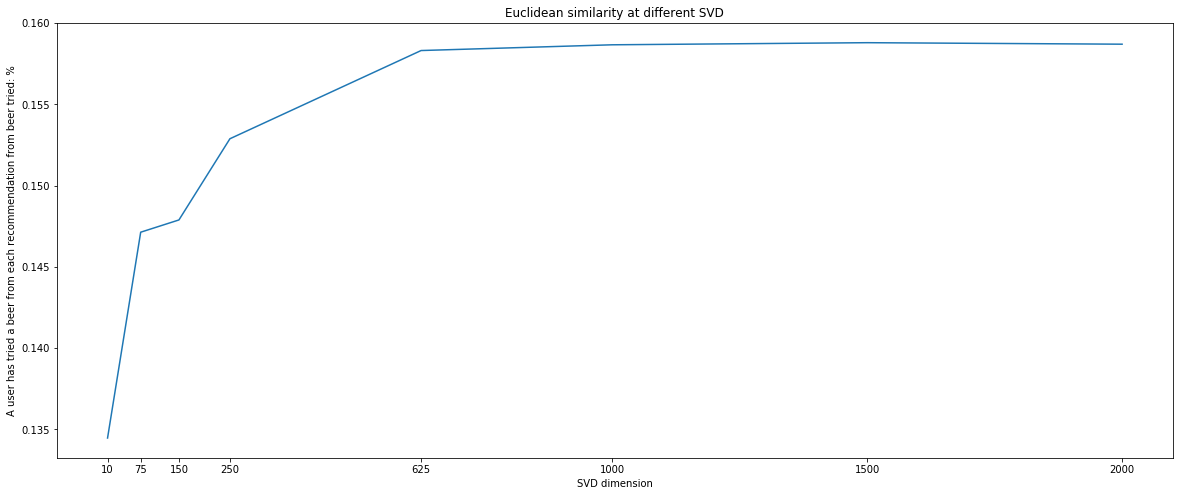

In [21]:
%matplotlib inline

plt.figure(figsize=[20,8])
plt.plot(components, recommendation_precision)
plt.title('Euclidean similarity at different SVD')
plt.ylabel('A user has tried a beer from each recommendation from beer tried: %')
plt.xlabel('SVD dimension')
plt.xticks(components)